In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm']
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow']


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Date - 0%
Location - 0%
MinTemp - 1%
MaxTemp - 1%
Rainfall - 2%
Evaporation - 43%
Sunshine - 48%
WindGustDir - 7%
WindGustSpeed - 7%
WindDir9am - 7%
WindDir3pm - 3%
WindSpeed9am - 1%
WindSpeed3pm - 2%
Humidity9am - 2%
Humidity3pm - 3%
Pressure9am - 10%
Pressure3pm - 10%
Cloud9am - 38%
Cloud3pm - 41%
Temp9am - 1%
Temp3pm - 2%
RainToday - 2%
RainTomorrow - 2%


In [5]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        med = df[col].median()
        df[col] = df[col].fillna(med)



imputing missing values for: MinTemp
imputing missing values for: MaxTemp
imputing missing values for: Rainfall
imputing missing values for: Evaporation
imputing missing values for: Sunshine
imputing missing values for: WindGustSpeed
imputing missing values for: WindSpeed9am
imputing missing values for: WindSpeed3pm
imputing missing values for: Humidity9am
imputing missing values for: Humidity3pm
imputing missing values for: Pressure9am
imputing missing values for: Pressure3pm
imputing missing values for: Cloud9am
imputing missing values for: Cloud3pm
imputing missing values for: Temp9am
imputing missing values for: Temp3pm


In [6]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

In [7]:
for col in numeric_cols:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    Lower_fence = df[col].quantile(0.25) - (IQR * 3)
    Upper_fence = df[col].quantile(0.75) + (IQR * 3)
    print('outliers are values < {lowerboundary} or > {upperboundary}.  '.format(
    lowerboundary=Lower_fence, upperboundary=Upper_fence))


outliers are values < -19.600000000000005 or > 44.10000000000001.  
outliers are values < -12.599999999999998 or > 58.8.  
outliers are values < -1.7999999999999998 or > 2.4.  
outliers are values < 0.39999999999999947 or > 8.8.  
outliers are values < 6.699999999999999 or > 10.2.  
outliers are values < -14.0 or > 91.0.  
outliers are values < -29.0 or > 55.0.  
outliers are values < -20.0 or > 57.0.  
outliers are values < -21.0 or > 161.0.  
outliers are values < -47.0 or > 149.0.  
outliers are values < 988.6000000000001 or > 1046.6999999999998.  
outliers are values < 986.2000000000002 or > 1044.2999999999997.  
outliers are values < -6.0 or > 15.0.  
outliers are values < -2.0 or > 12.0.  
outliers are values < -15.299999999999997 or > 49.099999999999994.  
outliers are values < -11.8 or > 54.7.  


In [8]:
#1 Outliers for MinTemp----
df.drop(df[ (df.MinTemp> 44.8) | (df.MinTemp < -20.299999999999997) ].index , inplace=True)


In [9]:
#2 Outliers for MaxTemp----
df.drop(df[ (df.MaxTemp> 59.1) | (df.MaxTemp < -13.000000000000004) ].index , inplace=True)

In [10]:
#3
df.drop(df[ (df.Rainfall>3.2) | (df.Rainfall < -2.4000000000000004) ].index , inplace=True)

In [11]:
#4
df.drop(df[ (df.Evaporation>21.800000000000004) | (df.Evaporation < -11.800000000000002) ].index , inplace=True)

In [12]:
#5
df.drop(df[ (df.Sunshine>28.0) | (df.Sunshine < -12.599999999999998) ].index , inplace=True)

In [13]:
#6
df.drop(df[ (df.WindGustSpeed>99.0) | (df.WindGustSpeed < -20.0) ].index , inplace=True)

In [14]:
#7
df.drop(df[ (df.WindSpeed9am>55.0) | (df.WindSpeed9am < -29.0) ].index , inplace=True)

In [15]:
df.drop(df[ (df.WindSpeed3pm>57.0) | (df.WindSpeed3pm < -20.0) ].index , inplace=True)

In [16]:
df.drop(df[ (df.Humidity9am>161.0) | (df.Humidity9am < -21.0) ].index , inplace=True)

In [17]:
df.drop(df[ (df.Humidity3pm>153.0) | (df.Humidity3pm < -50.0) ].index , inplace=True)

In [18]:
df.drop(df[ (df.Pressure9am>1050.9) | (df.Pressure9am <984.4 ) ].index , inplace=True)

In [19]:
df.drop(df[ (df.Pressure3pm>1044.2999999999997) | (df.Pressure3pm < 986.2000000000002) ].index , inplace=True)


In [20]:
df.drop(df[ (df. Cloud9am>15.0) | (df. Cloud9am < -6.0) ].index , inplace=True)

In [21]:
df.drop(df[ (df. Cloud3pm>12.0) | (df. Cloud3pm < -2.0) ].index , inplace=True)

In [22]:
df.drop(df[ (df.Temp9am>49.099999999999994) | (df.Temp9am < -15.299999999999997) ].index , inplace=True)

In [23]:
df.drop(df[ (df.Temp3pm> 54.7) | (df.Temp3pm < -11.8) ].index , inplace=True)

In [24]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [26]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday'
 'RainTomorrow']
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm']


In [27]:
del df['Date']
del df['Location']


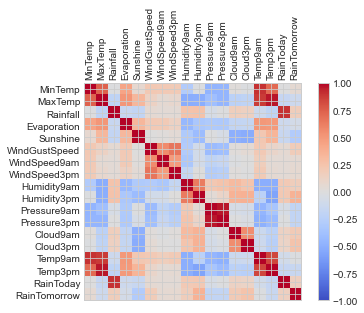

In [28]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numeric_cols),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_cols)
ax.set_yticklabels(numeric_cols)
plt.show()


In [29]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [30]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['WindGustDir' 'WindDir9am' 'WindDir3pm']


In [31]:
labelencoder = LabelEncoder()

In [32]:
d = {
'W' : 0,    
'SE': 1,       
'N'  :2,     
'SSE' : 3,     
'E' : 4,       
'S' : 5,       
'WSW' : 6,     
'SW'  : 7,     
'SSW'  : 8,    
'WNW'  : 9,    
'NW'  : 10,     
'ENE'  : 11,    
'ESE'  : 12,    
'NE'   : 13,    
'NNW'  : 14,    
'NNE'  : 15
}
df['WindGustDir'] = df['WindGustDir'].map(d)

In [33]:
df['WindDir3pm'] =labelencoder.fit_transform(df['WindDir3pm'])

In [34]:
df['WindDir9am'] =labelencoder.fit_transform(df['WindDir9am'])

In [35]:
features = ['MinTemp', 'MaxTemp' ,'Rainfall', 'Evaporation' ,'Sunshine' ,'WindGustSpeed', 'WindSpeed9am' ,'WindSpeed3pm', 'Humidity9am' ,'Humidity3pm' ,'Pressure9am','Pressure3pm', 'Cloud9am' ,'Cloud3pm', 'Temp9am', 'Temp3pm','WindGustDir', 'WindDir9am', 'WindDir3pm' ,'RainToday']

X = df[features]
y = df['RainTomorrow']


In [36]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,0,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,7.4,25.1,0.0,4.8,8.4,9,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,12.9,25.7,0.0,4.8,8.4,6,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4.8,8.4,13,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,17.5,32.3,1.0,4.8,8.4,0,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


[Text(167.4, 190.26, 'X[9] <= 75.5\ngini = 0.282\nsamples = 124051\nvalue = [103011, 21040]'),
 Text(83.7, 135.9, 'X[9] <= 58.5\ngini = 0.223\nsamples = 112828\nvalue = [98410, 14418]'),
 Text(41.85, 81.53999999999999, 'X[4] <= 7.75\ngini = 0.165\nsamples = 85358\nvalue = [77613, 7745]'),
 Text(20.925, 27.180000000000007, 'gini = 0.333\nsamples = 11934\nvalue = [9411, 2523]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.132\nsamples = 73424\nvalue = [68202, 5222]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 47.0\ngini = 0.368\nsamples = 27470\nvalue = [20797, 6673]'),
 Text(104.625, 27.180000000000007, 'gini = 0.324\nsamples = 22348\nvalue = [17807, 4541]'),
 Text(146.475, 27.180000000000007, 'gini = 0.486\nsamples = 5122\nvalue = [2990, 2132]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 83.5\ngini = 0.484\nsamples = 11223\nvalue = [4601, 6622]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 42.0\ngini = 0.496\nsamples = 5562\nvalue = [3042, 2520]'),
 Text(188.3250

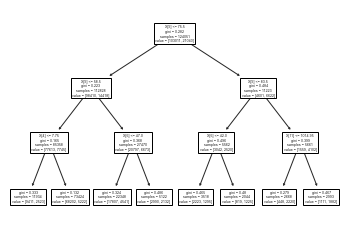

In [49]:
clf = DecisionTreeClassifier(max_depth =3,  random_state = 0)
                           
                           
clf.fit(X, y)
tree.plot_tree(clf)




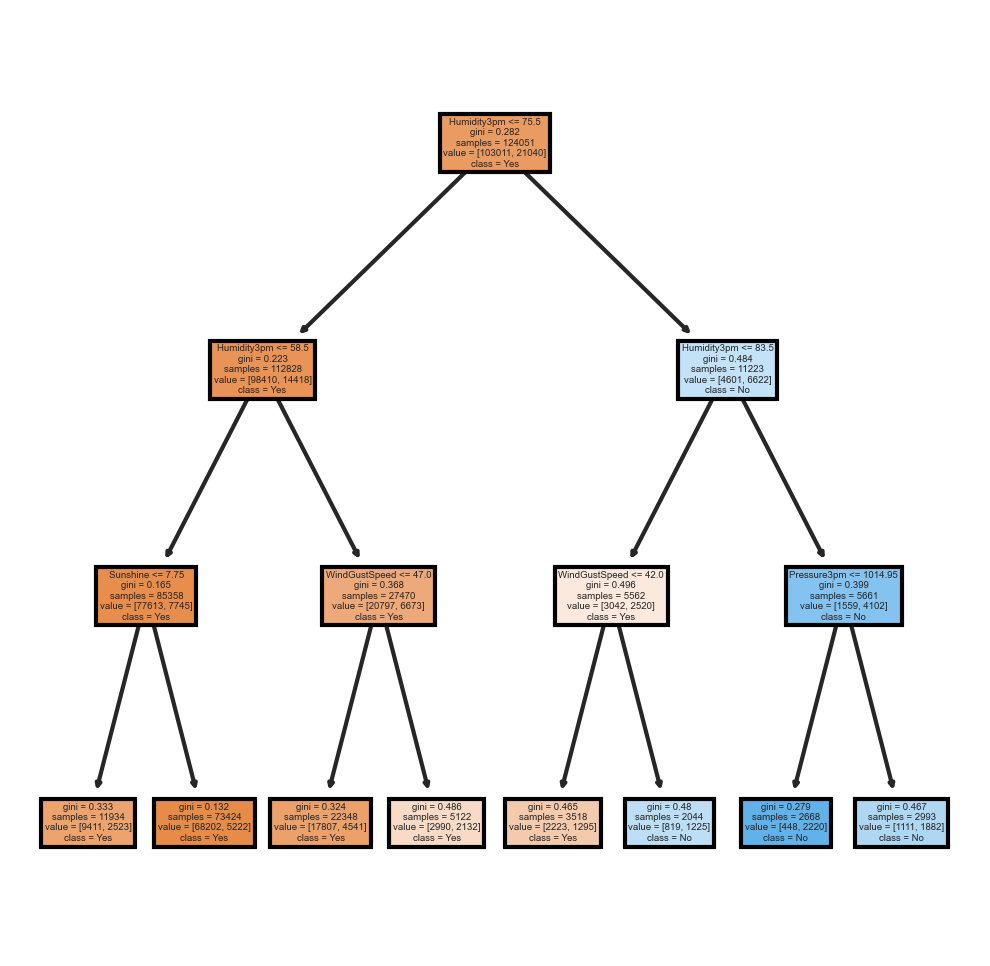

In [50]:
fn=['MinTemp', 'MaxTemp' ,'Rainfall', 'Evaporation' ,'Sunshine' ,'WindGustSpeed', 'WindSpeed9am' ,'WindSpeed3pm', 'Humidity9am' ,'Humidity3pm' ,'Pressure9am','Pressure3pm', 'Cloud9am' ,'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindDir9am', 'WindDir3pm' ,'RainToday','WindGustDir']
cn=['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('imagename.png')